# Анализ тарифов компании "Мегалайн"

В компании "Мегалайн" - федерального оператора сотовой связи - клиентам предлагают два тарифных плана: "Смарт" и "Ультра". Для корректировки рекламного бюджета коммерческому департаменту нужна информация о том, какой тариф приносит больше денег.

Нужно сделать предварительый анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод - какой тариф лучше.

<font size="4"><b>Описание тарифов</b></font>

**Тариф «Смарт»**

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

Изучим общую информацию о файлах наших исходных данных: сколько исходных файлов мы имеем, сколько имеется столбцов у таблиц, названия этих столбцов и их типов, а также количество строк каждого столбца. Еще нужно определить общие столцы для объединения данных из файлов в общую таблицу.

In [1]:
import pandas as pd
df_users = pd.read_csv('/datasets/users.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')

Рассморим более подробно таблицу, содержающую подробную информацию о пользователях.

In [2]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица df_users содержит 8 столбцов:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

В таблице df_users пустые значения имеются только в столбце churn_date. Столбцы user_id и age имеют целочисленный тип, а остальные - тип object.

Для проверки наших гипотез наиболее ценны столбы - user_id, city, tariff.

Рассмотрим первые пять строк нашей таблицы:

In [3]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Теперь перейдем к таблице с тарифами.

In [4]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица df_tariffs содержит 8 столбцов:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Так как мы рассматриваем только два тарифа, то и в данной таблице имеется только 2 строки. Пустых значений нет. Столбец с названием тарифа tariff_name имеет тип object, все остальные столбцы - целочисленный тип.

В данной таблице все столбцы нужны для проверки гипотез.

Рассмотрим данные нашей таблицы:

In [5]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Объединить таблицы можно будет по столбцу tariff в таблице df_users и tariff_name в таблице df_tariffs.

Перейдем к таблице, содержащую данные о звонках, df_calls.

In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица df_calls содержит 4 столбца:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

В таблице есть 2 столбца id и call_date, имеющие тип данных object, столбец duration - вещественный тип, а столбец user_id - целочисленный тип.

Для проверки гипотез в таблице df_calls наиболее ценны столбцы call_date, duration и user_id.

Рассмотрим первые пять строк нашей таблицы: 

In [7]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Связать данные из двух таблиц df_calls и df_users можно по столбцу user_id, содержащего идентификатор пользователя.

Перейдем к таблице, содержащую данные о интернет-траффике, df_internet.

In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица df_internet содержит 5 столбцов, 4 нам известны:

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Столбец с названием Unnamed: 0 - неизвестный столбец. Рассмотрим подробнее содержимое нашей таблицы.



In [9]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Как видно из данных, данный столбец полностью повторяет номер столбца. Скорее всего он появился при записи наших данных. Полезную информацию он не несет, поэтому можно от него избавиться. Перезапишем таблицу df_internet без лишнего столбца.

In [10]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)

In [11]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Столбцы id и session_date содержат информацию типа object, столбец mb_used - вещественный тип, а user_id - целый. Связать данные из двух таблиц df_internet и df_users можно также по столбцу user_id, содержащего идентификатор пользователя.

Для проверки гипотез в таблице df_internet наиболее ценны столбцы mb_used, session_date и user_id.

Рассмотрим последнюю таблицу df_messages.

In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица df_messages содержит 3 столбца:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Столбцы id, message_date имеют тип данных object, а столбец user_id - целочисленный тип.

Для проверки гипотез в таблице df_messages наиболее ценны столбцы message_date и user_id.

Рассмотрим первые пять строк нашей таблицы:

In [13]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


 Связать данные из двух таблиц df_messages и df_users можно также по столбцу user_id, содержащего идентификатор пользователя.

 ### Вывод

Рассмотрев внимательно 5 таблиц из нашего проекта, мы можем сделать следующие выводы:

1. Пустые значения в данных отсуствуют, за исключением столбца churn_date в таблице df_users, где пустое значение означает, что тариф на момент выгрузки данных еще действовал у пользователя. То есть в данном случает пустые значения в столбце не являются ошибкой, а несут определенную информацию.
2. С помощью столбца user_id, который присутсвует в таблицах df_users, df_calls, df_internet и df_messages, можно объединить данные из разных таблиц. Связать данные из таблиц df_users и tariff_name можно будет по столбцу tariff в таблице df_users и tariff_name в таблице df_tariffs.
3. Столбцы, которые содержат дату, имеют тип  object, их нужно перевести в формат даты.
4. В таблице df_internet присутствует столбец Unnamed: 0, содержащую индексы строк, мы избавились от него, перезаписав таблицу.
5. Для проверки наших гипотез наиболее ценны в таблице id_users - столбцы user_id, city, tariff; в таблице ds_tariffs - все столбцы; в таблице df_calls - столбцы call_date, duration и user_id; в таблице df_internet - столбцы mb_used, session_date и user_id; в таблице df_messages - столбцы message_date и user_id.

## Предобработка данных

### Переименование столбцов

Для объединения данных в таблицах df_users и df_tariff переименуем название тарифа столбца tariff в таблице df_users на tariff_name.

In [14]:
df_users.rename(columns={'tariff': 'tariff_name'}, inplace=True)
df_users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff_name'],
      dtype='object')

In [15]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Замена типа данных

Прежде чем объединять данные в таблицах, сначала приведем в более удобный тип данных. 
Рассмотрим таблицу df_calls. Переведем столбец, содержащий дату звонка call_date, с типа object в тип дату.

In [16]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Округлим длительность звонка в столбце duration до целых минут. Мы помним, что в компании "Мегалайн" минуты округляются вверх после каждого звонка.

In [17]:
import numpy as np
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Теперь теперь рассмотрим таблицу df_messages. Переведем столбец, содержащий дату отправки сообщения message_date, с типа object в тип дату.

In [18]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Теперь теперь рассмотрим таблицу df_internet. Переведем столбец, содержащий дату интернет-сессии session_date, с типа object в тип дату.

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Обработка дубликатов

Проверим таблицы на наличие дубликатов.

In [20]:
df_users.duplicated().sum()

0

In [21]:
df_calls.duplicated().sum()

0

In [22]:
df_messages.duplicated().sum()

0

In [23]:
df_internet.duplicated().sum()

0

Явных дубликатов нет. Проверим данные на наличие скрытых дубликатов.

In [24]:
df_users['user_id'].nunique()

500

In [25]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [26]:
df_users['tariff_name'].value_counts()

smart    351
ultra    149
Name: tariff_name, dtype: int64

In [27]:
df_calls['user_id'].nunique()

492

Напишем функцию, которая строит гистограмму частот и график плотностей.

In [28]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
# функция hist_bloxplot принимает название столбца column, а возвращает гистограмму и диаграмму размаха
def hist_boxplot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    plt.subplot(1, 2, 1)
    if IQR < 10: 
        ax1 = df[column].hist(bins='sturges', figsize =(15,5))
    else:
        ax1 = df[column].hist(bins='doane', figsize =(15,5))
    
    plt.title(column)
    plt.xlabel('values')
    plt.ylabel('frequency')
    
    plt.subplot(1, 2, 2)
    ax2 = df.boxplot(column = column)
    plt.title(column)
    plt.ylabel('values')
    #plt.show()
    
    return (ax1, ax2)

Рассмотрим данные столбца duration, содержащий данные о количестве минут в месяц.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f24db2aff90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f24dcdc8350>)

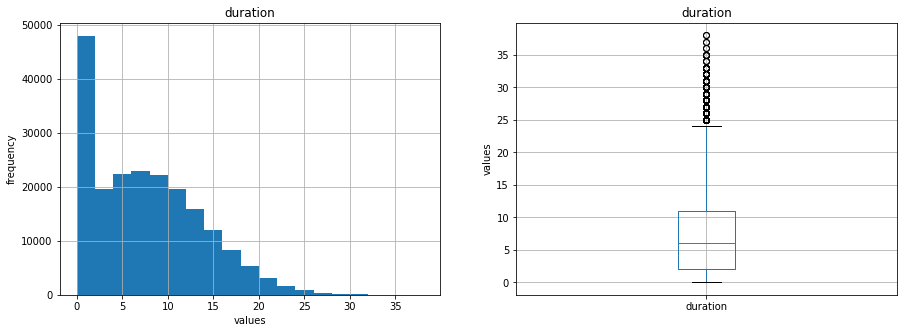

In [29]:
hist_boxplot(df_calls, 'duration')

In [30]:
df_calls.query('duration == 0')['duration'].count()

39613

В столбце duration в большим перевесом содержатся нулевые значения. Скорее всего они означают пропущенные звонки.

Рассмотрим данные без учета пропущенных звонков.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f24d7fd28d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f24d7fa5810>)

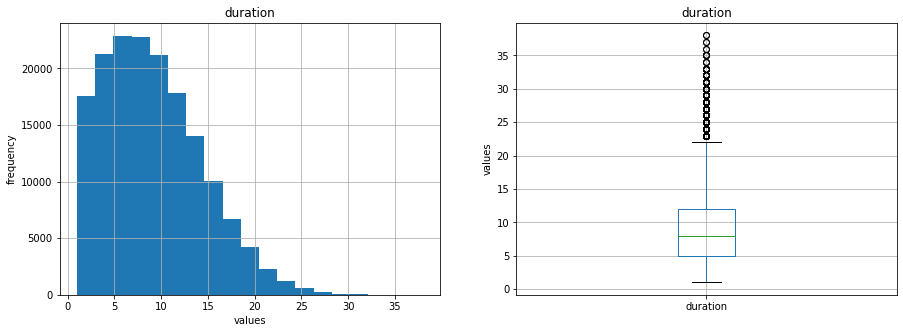

In [31]:
hist_boxplot(df_calls.query('duration != 0'), 'duration')

Данное распределение выглядит как распределение Пуассона. Никаких других аномалий, кроме нулевых, не видно.

Перейдем к столбцу mb_used, содержащий данные использованных мегабайт.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f24d7eac390>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f24d7e44ed0>)

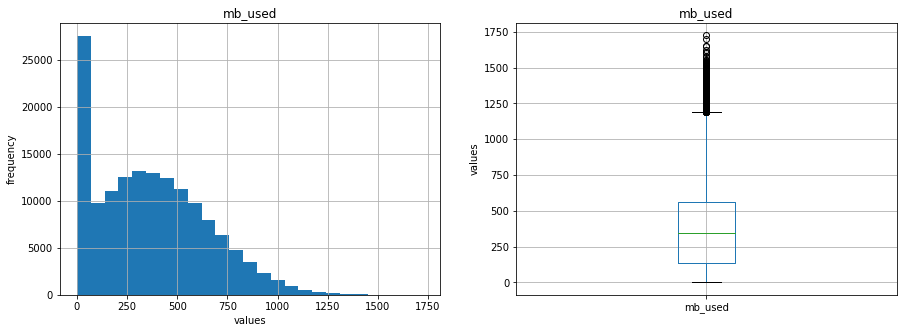

In [32]:
hist_boxplot(df_internet, 'mb_used')

В столбце mb_used в большим перевесом содержатся нулевые значения.Скорее всего в них содуржится служебный трафик, сорвавшееся соединение или трафик, который предоставляется бесплатно для пользователя. Например, для некоторых тарифов могут быть бесплатны доступ к госуслугам, в определнные социальные сети и т.д.

Рассмотрим данные столбца mb_used без учета нулевого трафика.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f24cf882790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f24cf7e2290>)

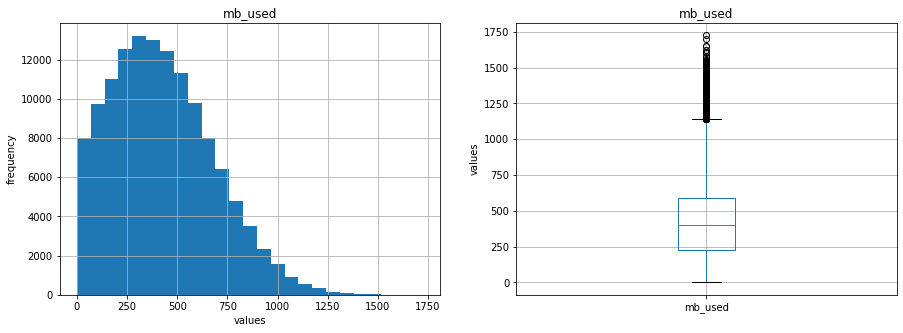

In [33]:
hist_boxplot(df_internet.query('mb_used != 0'), 'mb_used')

Рассматриваемое распределение, как и распределение с данными о количестве минут звонков, выглядит как нормальное распределение. Есть большие выбросы в большую сторону, но такие аномалии могут быть, например, если у кото-то из клиентов включен в фоновом режиме программа которая постоянно имеет доступ к интернет и посылает данные на сервер. Например, это может быть, постоянно включенный GSM  модуль в програграмме карт.

Создадим новый столбец type, где будет содержаться тип данных кажой строки.

In [34]:
df_calls['type'] = 'call'
df_messages['type'] = 'message'
df_internet['type'] = 'internet'

### Объединение таблиц

Создадим сначала общую таблицу со всеми данным по каждой операции, а потом из нее создадим сводную таблицу по месяцам по каждому пользователю.

Для начала переименуем в наших исходных таблицах столбцы: дату операции во всех таблицах переименуем в date_action, а столбец id, содуржащий идентификационный номер операции, соотвественно в call_id, message_id и internet_id в зависимости к какому типу операции он относится.

In [35]:
df_calls.rename(columns={'call_date': 'date_action', 'id':'call_id'}, inplace=True)
df_messages.rename(columns={'message_date': 'date_action', 'id':'message_id'}, inplace=True)
df_internet.rename(columns={'session_date': 'date_action', 'id':'internet_id'}, inplace=True)

Теперь объединим таблицы с звонками, интернет-трафиком и сообщениями в общую таблицу df_actions.

In [36]:
df_actions = df_calls.merge(df_internet, on = ['user_id', 'date_action', 'type'], how='outer')
df_actions = df_actions.merge(df_messages, on = ['user_id', 'date_action', 'type'], how='outer')

In [37]:
df_actions.tail()

,call_id,date_action,duration,user_id,type,internet_id,mb_used,message_id
475034,NaN,2018-10-04,NaN,1499,message,NaN,NaN,1499_161
475035,NaN,2018-12-28,NaN,1499,message,NaN,NaN,1499_163
475036,NaN,2018-10-23,NaN,1499,message,NaN,NaN,1499_164
475037,NaN,2018-11-27,NaN,1499,message,NaN,NaN,1499_169
475038,NaN,2018-10-09,NaN,1499,message,NaN,NaN,1499_175


Нам нужно, чтобы в новой таблице df_actions данные столбцов о дате операции date_action, идентификационного номера пользователя user_id и тип операции type были полностью заполнены без пропусков, а остальные столбцы могут иметь пустые значения. Посмотрим количество пропусков в таблице df_actions.

In [38]:
df_actions.isnull().sum()

call_id        272432
date_action         0
duration       272432
user_id             0
type                0
internet_id    325643
mb_used        325643
message_id     352003
dtype: int64

Объединение прошло успешно, теперь объединим нашу таблицу df_actions, содержащую данные о всех операциях, с таблицей df_users, содержащей данные о пользователях.

In [39]:
df = df_users.merge(df_actions, on = 'user_id', how='outer')

Добавим данные из таблицы df_tariffs к общей таблице df.

In [40]:
df = df.merge(df_tariffs, on = 'tariff_name', how='outer')

In [41]:
df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,call_id,date_action,...,internet_id,mb_used,message_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,...,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_52,2018-07-25,...,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,...,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_184,2018-08-17,...,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_327,2018-08-17,...,NaN,NaN,NaN,1000,30720,3000,1950,150,1,1


Посмотрим сколько строк и столбцов данная таблица имеет.

In [42]:
df.shape

(475041, 22)

### Вывод

В пункте предобработка данных мы:
1. Переименовали столбец tariff в  tariff_name, перевели столбцы, содержащие даты, в тип datetime. Округлили использованные минуты в большую степень согласно политики компании.
2. Изучили данные столбцов duration в таблице df_calls и mb_used в таблице df_internet, изучили данные на наличие артефактов, выяснили, что пустые значения в таблице df_calls означают пропущенные звонки, а в таблице df_internet - сорвавшийся или служебный трафик. Также проверили другие столбцы в наших таблицах на наличие ошибок.
3. Объединили таблицы df_users, df_call, df_messages и df_internet и df_tariffs в общую таблицу. Создали новый столбец type, содержащий тип операции.

Теперь данные готовы к дальнейшей работе.

## Расчеты и добавление данных в таблицу

### Приведение талицы к удобному виду

Добавим столбец month, в котором будет храниться месяц совершения операции.

In [43]:
df['month'] = df.query('date_action.dt.year == 2018')['date_action'].dt.month

In [44]:
df.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,call_id,date_action,...,mb_used,message_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_0,2018-07-25,...,NaN,NaN,1000,30720,3000,1950,150,1,1,7.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_52,2018-07-25,...,NaN,NaN,1000,30720,3000,1950,150,1,1,7.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_1,2018-08-17,...,NaN,NaN,1000,30720,3000,1950,150,1,1,8.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_184,2018-08-17,...,NaN,NaN,1000,30720,3000,1950,150,1,1,8.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000_327,2018-08-17,...,NaN,NaN,1000,30720,3000,1950,150,1,1,8.0


Проверим талицу на пропущенные значения.

In [45]:
df.isnull().mean()

user_id                  0.000000
age                      0.000000
churn_date               0.951566
city                     0.000000
first_name               0.000000
last_name                0.000000
reg_date                 0.000000
tariff_name              0.000000
call_id                  0.573496
date_action              0.000004
duration                 0.573496
type                     0.000004
internet_id              0.685509
mb_used                  0.685509
message_id               0.740999
messages_included        0.000000
mb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
month                    0.000004
dtype: float64

В столбцах date_action и month содержатся пустые значения. Посмотрим их более подробно.

In [46]:
df.query('date_action.isnull()')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,call_id,date_action,...,mb_used,message_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
35802,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaT,...,NaN,NaN,1000,30720,3000,1950,150,1,1,NaN
389350,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaT,...,NaN,NaN,50,15360,500,550,200,3,3,NaN


Есть два пользователя, которые не совершили ни одной операции. Скорее всего, больше данных с этими пользователями нет. Проверим это предположение.

In [47]:
df.query('user_id == 1128 or user_id == 1371')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,call_id,date_action,...,mb_used,message_id,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month
35802,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaT,...,NaN,NaN,1000,30720,3000,1950,150,1,1,NaN
389350,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaT,...,NaN,NaN,50,15360,500,550,200,3,3,NaN


Действительно, есть по одному пользователю в каждом тарифе, который не совершил ни одной операции и уже прекратил действие договора.

Перейдем к созданию сводной таблицы. Для этого создадим промежуточные таблицы, содержищие данные по звонках, сообщениях и используемому интернет-трафику, сгруппированному по каждому пользователю и по месяцам.

Создадим сводную таблицу df_group_month, в которой содержатся данные о количестве звонков, количестве используемых минут и сообщений, а также использованного интернет-трафика в кажом месяце для каждого пользователя.

In [48]:
df_group_month = df.groupby(['user_id', 'month']).agg({'duration': ['count', 'sum'], \
                                                       'message_id': 'count', 'mb_used': 'sum'})
df_group_month.head()

duration        message_id   mb_used
                 count    sum      count       sum
user_id month                                     
1000    5.0         22  159.0         22   2253.49
        6.0         43  172.0         60  23233.77
        7.0         47  340.0         75  14003.64
        8.0         52  408.0         81  14055.93
        9.0         58  466.0         57  14568.91

Для удобства работы переименуем столбцы.

In [49]:
df_group_month.columns = df_group_month.columns.map(''.join)
df_group_month.rename(columns={'durationcount': 'call_count', 'durationsum': 'call_sum',\
                               'message_idcount':'message_count', 'mb_usedsum': 'mb_used_sum'}, inplace=True)

In [50]:
df_group_month.head()

call_count  call_sum  message_count  mb_used_sum
user_id month                                                  
1000    5.0            22     159.0             22      2253.49
        6.0            43     172.0             60     23233.77
        7.0            47     340.0             75     14003.64
        8.0            52     408.0             81     14055.93
        9.0            58     466.0             57     14568.91

Теперь создадим новую таблицу df_main, сгрупперованную по пользователям и месяцам и применим функцию first().

In [51]:
df_main = df.groupby(['user_id', 'month']).first()

Теперь объединим полученную таблицу с таблицей, содержащей данные об операциях df_group_month.

In [52]:
df_main = df_main.join(df_group_month, how='outer')

In [53]:
df_main.head()

age churn_date       city first_name  last_name   reg_date  \
user_id month                                                               
1000    5.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        6.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        7.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        8.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        9.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   

              tariff_name  call_id date_action  duration  ...  \
user_id month                                             ...   
1000    5.0         ultra  1000_11  2018-05-28      19.0  ...   
        6.0         ultra   1000_2  2018-06-11       3.0  ...   
        7.0         ultra   1000_0  2018-07-25       0.0  ...   
        8.0         ultra   1000_1  2018-08-17       0.0  ...   
        9.0         ultra   1000_3  2018-09-21      14.0  ...   

              mb_per_month_included minutes_included  rub_monthly_fee  \
user_id month                                                           
1000    5.0                   30720             3000             1950   
        6.0                   30720             3000             1950   
        7.0                   30720             3000             1950   
        8.0                   30720             3000             1950   
        9.0                   30720             3000             1950   

              rub_per_gb  rub_per_message  rub_per_minute  call_count  \
user_id month                                                           
1000    5.0          150                1               1          22   
        6.0          150                1               1          43   
        7.0          150                1               1          47   
        8.0          150                1               1          52   
        9.0          150                1               1          58   

               call_sum  message_count  mb_used_sum  
user_id month                                        
1000    5.0       159.0             22      2253.49  
        6.0       172.0             60     23233.77  
        7.0       340.0             75     14003.64  
        8.0       408.0             81     14055.93  
        9.0       466.0             57     14568.91  

[5 rows x 25 columns]

Удалим ставшими после группировки некорректными столбцы.

In [54]:
df_main.drop(
    ['type', 'call_id', 'date_action', 'message_id', 'internet_id', 'duration', 'mb_used'], axis = 1, inplace = True
)

In [55]:
df_main

age  churn_date         city first_name  last_name   reg_date  \
user_id month                                                                  
1000    5.0     52         NaN    Краснодар     Рафаил  Верещагин 2018-05-25   
        6.0     52         NaN    Краснодар     Рафаил  Верещагин 2018-05-25   
        7.0     52         NaN    Краснодар     Рафаил  Верещагин 2018-05-25   
        8.0     52         NaN    Краснодар     Рафаил  Верещагин 2018-05-25   
        9.0     52         NaN    Краснодар     Рафаил  Верещагин 2018-05-25   
...            ...         ...          ...        ...        ...        ...   
1498    10.0    68  2018-10-25  Владикавказ   Всеволод    Акимчин 2018-07-19   
1499    9.0     35         NaN        Пермь     Гектор   Корнилов 2018-09-27   
        10.0    35         NaN        Пермь     Гектор   Корнилов 2018-09-27   
        11.0    35         NaN        Пермь     Гектор   Корнилов 2018-09-27   
        12.0    35         NaN        Пермь     Гектор   Корнилов 2018-09-27   

              tariff_name  messages_included  mb_per_month_included  \
user_id month                                                         
1000    5.0         ultra               1000                  30720   
        6.0         ultra               1000                  30720   
        7.0         ultra               1000                  30720   
        8.0         ultra               1000                  30720   
        9.0         ultra               1000                  30720   
...                   ...                ...                    ...   
1498    10.0        smart                 50                  15360   
1499    9.0         smart                 50                  15360   
        10.0        smart                 50                  15360   
        11.0        smart                 50                  15360   
        12.0        smart                 50                  15360   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5.0                3000             1950         150                1   
        6.0                3000             1950         150                1   
        7.0                3000             1950         150                1   
        8.0                3000             1950         150                1   
        9.0                3000             1950         150                1   
...                         ...              ...         ...              ...   
1498    10.0                500              550         200                3   
1499    9.0                 500              550         200                3   
        10.0                500              550         200                3   
        11.0                500              550         200                3   
        12.0                500              550         200                3   

               rub_per_minute  call_count  call_sum  message_count  \
user_id month                                                        
1000    5.0                 1          22     159.0             22   
        6.0                 1          43     172.0             60   
        7.0                 1          47     340.0             75   
        8.0                 1          52     408.0             81   
        9.0                 1          58     466.0             57   
...                       ...         ...       ...            ...   
1498    10.0                3          41     247.0             42   
1499    9.0                 3           9      70.0             11   
        10.0                3          68     449.0             48   
        11.0                3          74     612.0             59   
        12.0                3          69     492.0             66   

               mb_used_sum  
user_id month               
1000    5.0        2253.49 

### Добавление новых данных

Создадим новый столбец gb_used_sum, где будят храняться данные использованного интернета в Gb, округленного вверх до целых значений, а также округлим данные столбца mb_used_sum также до целых значенний.

In [56]:
df_main['gb_used_sum'] = df_main['mb_used_sum'] / 1024
df_main['gb_used_sum'] = df_main['gb_used_sum'].apply(np.ceil).astype(int)
df_main['mb_used_sum'] = df_main['gb_used_sum'] * 1024

In [57]:
df_main.head()

age churn_date       city first_name  last_name   reg_date  \
user_id month                                                               
1000    5.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        6.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        7.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        8.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        9.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   

              tariff_name  messages_included  mb_per_month_included  \
user_id month                                                         
1000    5.0         ultra               1000                  30720   
        6.0         ultra               1000                  30720   
        7.0         ultra               1000                  30720   
        8.0         ultra               1000                  30720   
        9.0         ultra               1000                  30720   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5.0                3000             1950         150                1   
        6.0                3000             1950         150                1   
        7.0                3000             1950         150                1   
        8.0                3000             1950         150                1   
        9.0                3000             1950         150                1   

               rub_per_minute  call_count  call_sum  message_count  \
user_id month                                                        
1000    5.0                 1          22     159.0             22   
        6.0                 1          43     172.0             60   
        7.0                 1          47     340.0             75   
        8.0                 1          52     408.0             81   
        9.0                 1          58     466.0             57   

               mb_used_sum  gb_used_sum  
user_id month                            
1000    5.0           3072            3  
        6.0          23552           23  
        7.0          14336           14  
        8.0          14336           14  
        9.0          15360           15

Теперь напишем функцию profit, вычисляющую выручку для каждого пользователя по месяцам.

In [58]:
def profit(call_sum, message_count, gb_used_sum, messages_included,\
           mb_per_month_included, minutes_included, rub_monthly_fee, rub_per_gb, rub_per_message, rub_per_minute):

    gb_per_month_included = mb_per_month_included / 1024
    if call_sum <= minutes_included:
        calls = 0
    else:
        calls = call_sum - minutes_included
        
    if message_count <= messages_included:
        messages = 0
    else:
        messages = message_count - messages_included
    
    if gb_used_sum <= gb_per_month_included:
        gb = 0
    else:
        gb = gb_used_sum - gb_per_month_included
    
    return rub_monthly_fee + calls * rub_per_minute + messages * rub_per_message + gb * rub_per_gb

In [59]:
df_main['profit'] = df_main.apply(
    lambda x: profit(x['call_sum'], x['message_count'], x['gb_used_sum'], x['messages_included'], \
                     x['mb_per_month_included'], x['minutes_included'], x['rub_monthly_fee'], \
                     x['rub_per_gb'], x['rub_per_message'], x['rub_per_minute']), \
    axis=1
)

Посмотрим, что получилось.

In [60]:
df_main.head()

age churn_date       city first_name  last_name   reg_date  \
user_id month                                                               
1000    5.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        6.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        7.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        8.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        9.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   

              tariff_name  messages_included  mb_per_month_included  \
user_id month                                                         
1000    5.0         ultra               1000                  30720   
        6.0         ultra               1000                  30720   
        7.0         ultra               1000                  30720   
        8.0         ultra               1000                  30720   
        9.0         ultra               1000                  30720   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5.0                3000             1950         150                1   
        6.0                3000             1950         150                1   
        7.0                3000             1950         150                1   
        8.0                3000             1950         150                1   
        9.0                3000             1950         150                1   

               rub_per_minute  call_count  call_sum  message_count  \
user_id month                                                        
1000    5.0                 1          22     159.0             22   
        6.0                 1          43     172.0             60   
        7.0                 1          47     340.0             75   
        8.0                 1          52     408.0             81   
        9.0                 1          58     466.0             57   

               mb_used_sum  gb_used_sum  profit  
user_id month                                    
1000    5.0           3072            3  1950.0  
        6.0          23552           23  1950.0  
        7.0          14336           14  1950.0  
        8.0          14336           14  1950.0  
        9.0          15360           15  1950.0

Теперь напишем функцию use_include_data, которая вычисляет использовал ли полностью включенные в тариф минуты, сообщения или интернет-трафик, и если да, то данная функция созвращает значение True, а если неиспользуемые минуты, сообщения или гигабайты интернет-трафика остались - то False.

In [61]:
def use_include_data(type_data, column, tariff_name):
    if tariff_name == 'smart':
        if type_data == 'call':
            return column >= 500
        elif type_data == 'message':
            return column >= 50
        elif type_data == 'internet':
            return column >= 15
    elif tariff_name == 'ultra':
        if type_data == 'call':
            return column >= 3000
        elif type_data == 'message':
            return column >= 1000
        elif type_data == 'internet':
            return column >= 30

Создадим новые столбцы call_done, message_done и internet_done, в которых будет содержаться True, если включенные в тариф звонков, сообщений или интернет-трафика использованы полностью, и False - в противном случае.

In [62]:
df_main['call_done'] = df_main.apply(lambda x: use_include_data('call', x['call_sum'], x['tariff_name']), axis=1)

In [63]:
df_main['message_done'] = df_main.apply(lambda x: use_include_data('message', x['message_count'], x['tariff_name']), 
                                        axis=1)

In [64]:
df_main['internet_done'] = df_main.apply(lambda x: use_include_data('internet', x['gb_used_sum'], x['tariff_name']), 
                                         axis=1)

In [65]:
df_main.head()

age churn_date       city first_name  last_name   reg_date  \
user_id month                                                               
1000    5.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        6.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        7.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        8.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   
        9.0     52        NaN  Краснодар     Рафаил  Верещагин 2018-05-25   

              tariff_name  messages_included  mb_per_month_included  \
user_id month                                                         
1000    5.0         ultra               1000                  30720   
        6.0         ultra               1000                  30720   
        7.0         ultra               1000                  30720   
        8.0         ultra               1000                  30720   
        9.0         ultra               1000                  30720   

               minutes_included  ...  rub_per_minute  call_count  call_sum  \
user_id month                    ...                                         
1000    5.0                3000  ...               1          22     159.0   
        6.0                3000  ...               1          43     172.0   
        7.0                3000  ...               1          47     340.0   
        8.0                3000  ...               1          52     408.0   
        9.0                3000  ...               1          58     466.0   

               message_count  mb_used_sum  gb_used_sum  profit  call_done  \
user_id month                                                               
1000    5.0               22         3072            3  1950.0      False   
        6.0               60        23552           23  1950.0      False   
        7.0               75        14336           14  1950.0      False   
        8.0               81        14336           14  1950.0      False   
        9.0               57        15360           15  1950.0      False   

               message_done  internet_done  
user_id month                               
1000    5.0           False          False  
        6.0           False          False  
        7.0           False          False  
        8.0           False          False  
        9.0           False          False  

[5 rows x 23 columns]

### Вывод

На этапе расчетов и добалениея данных в таблицу, можно сделать следующие выводы:
1. Мы сгруппировали наши данные по каждому пользователю и по месяцам, добавили новый столбец month с месяцем совершения операции.
2. Вычислили количество звонков и количество использованных минут. Вычислили количество сообщений и объем используемого интернет-трафика в мегабайтах и гигабайтах, огруглили до целый гигабайт.
3. Вычислили помесячную выручку для кажого пользователя и записали ее в столбец profit.
4. Создали столбцы call_done, message_done и internet_done и пометили в них успели ли использовать полностью предоставленный лимит звонков, сообщений и интернет-траффика в каждом месяце для каждого пользователя.

Вычисленные новые столбцы помогут нам пронанализировать наши данные.

## Анализ данных

### Анализ поведения клиентов

Проанализируем отдельно для каждого тарифа поведение пользователей. Выясним сколько в среднем требуется для каждого пользователя суммарного количества звонков, сообщений и интернет-трафика.

Напишем функцию describe_stat, которая вычисляет для каждого тарифа отдельно среднее и медианное значение, дисперсию и стандартное отклонение, а также строит гистограмму передоваемых данных (суммарное количество минут, количество сообщений, используемого интернет-трафика)

In [66]:
df_main['minutes_included'].iloc[0]

3000

In [67]:
import numpy as np
import seaborn as sns
def describe_stat(df, column, bins):
    ultra = df.query('tariff_name == "ultra"')
    smart = df.query('tariff_name == "smart"')
    
    label = True
    if column == 'call_sum':
        smart_value = smart['minutes_included'].iloc[0]
        ultra_value = ultra['minutes_included'].iloc[0]
    elif column == 'message_count':
        smart_value = smart['messages_included'].iloc[0]
        ultra_value = ultra['messages_included'].iloc[0]
    elif column == 'mb_used_sum':
        smart_value = smart['mb_per_month_included'].iloc[0]
        ultra_value = ultra['mb_per_month_included'].iloc[0]
    elif column == 'gb_used_sum':
        smart_value = smart['mb_per_month_included'].iloc[0] / 1024
        ultra_value = ultra['mb_per_month_included'].iloc[0] / 1024
    else:
        label = False
    
   
    print('                        Характеристика столбца', column)
    print()
    print('                         Тариф smart                                   Тариф ultra')
    print('Общее количество:         {:10.2f}                                     {:10.2f}'.format(
        smart[column].count(), ultra[column].count())
         )
    print('Среднее арифметическое:   {:10.2f}                                     {:10.2f}'.format(
        smart[column].mean(), ultra[column].mean())
         )
    print('Медиана:                  {:10.2f}                                     {:10.2f}'.format(
        smart[column].median(), ultra[column].median())
         )
    print('Дисперсия:                {:10.2f}                                     {:10.2f}'.format(
        np.var(smart[column]), np.var(ultra[column]))
         )
    print('Стандартное отклонение:   {:10.2f}                                     {:10.2f}'.format(
        np.std(smart[column]), np.std(ultra[column]))
         )
    
    sns.set(rc={"figure.figsize": (15, 10)})
    plt.subplot(2, 2, 1)
    sns.distplot(smart[column], kde=False, bins = bins)
    plt.title('smart')
    plt.grid(True)
    plt.xlabel('values')
    plt.ylabel('frequency')
    if label == True:
        plt.axvline(x=smart_value)
    
    plt.subplot(2, 2, 2)
    sns.violinplot(x=column, data=smart)
    plt.title('smart')
    plt.xlabel('values')
    
    plt.subplot(2, 2, 3)
    sns.distplot(ultra[column], kde=False, bins = bins)
    plt.grid(True)
    plt.title('ultra')
    if label == True:
        plt.axvline(x=ultra_value)
    
    plt.subplot(2, 2, 4)
    sns.violinplot(x=column, data=ultra)
    plt.title('ultra')
    plt.xlabel('values')

Применим нашу функцию для столбца call_sum, содержащий суммарное количество минут по каждому месяцу для каждого пользователя.

                        Характеристика столбца call_sum

                         Тариф smart                                   Тариф ultra
Общее количество:            2229.00                                         985.00
Среднее арифметическое:       417.93                                         526.62
Медиана:                      422.00                                         518.00
Дисперсия:                  36203.07                                      100771.22
Стандартное отклонение:       190.27                                         317.44


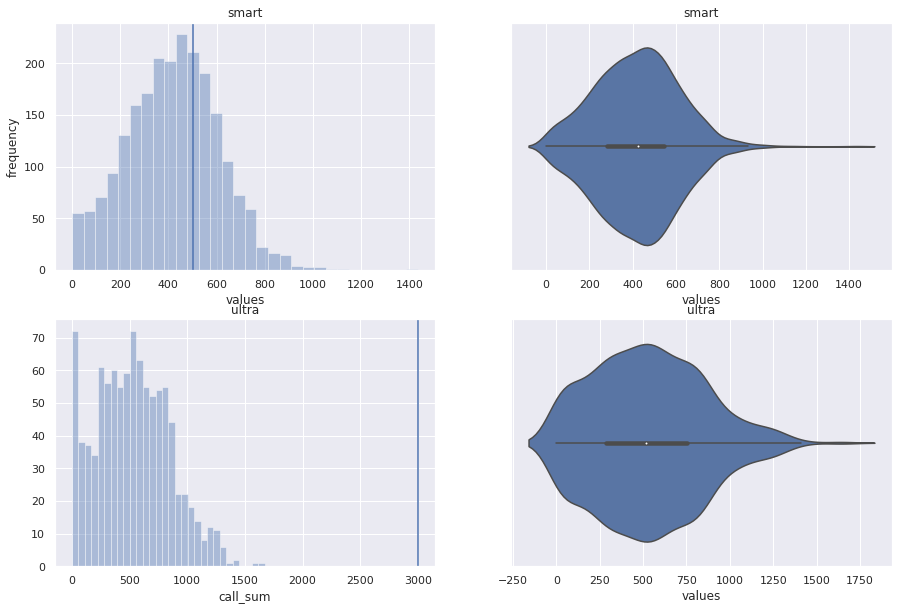

In [68]:
describe_stat(df_main, 'call_sum', 30)

Как видно из полученных данных в тарифе smart среднее количество использованных минут - 417.93, а медианное значение больше среднего - 422.00. Это означает,что график смещен всправо. Разброс значений  - 190.27 минут. Пользователи тарифа смарт стараются не выходить за предел лимита тарифа - 550 минут, но при этом большинство клиентов стараются максимально израсходовать включенные в тариф минуты.

Если рассмотреть поведение пользователей тарифа ultra, то из данных видно, что больше всего пропущенных звонков. Среднее количество использованных минут больше, чем в тарифе smart - 526 минут, но ненамного -  примерно всего на 110 минут. В выборке нет пользователей, которые бы использовали весь лимит звонков в месяц. Медианное значение количества использованных минут в тарифе ultra меньше среднего - 518 минут, значит график смещен в отрицательную сторону влево. Стандартное отклонение больше, чем в тарифе smart - 317.44 минут. Это значит, что пользователи тарифа ultra не так стремятся использовать лимит предоставленных минут. Также это может быть причиной такого стандатного отклонения то, что выборка клиентов тарифа ultra в 2 раза меньше клиентов тарифа smart.

Рассмотрим данные без учета пропущенных звонков.

                        Характеристика столбца call_sum

                         Тариф smart                                   Тариф ultra
Общее количество:            2221.00                                         947.00
Среднее арифметическое:       419.44                                         547.76
Медиана:                      423.00                                         529.00
Дисперсия:                  35702.05                                       93239.87
Стандартное отклонение:       188.95                                         305.35


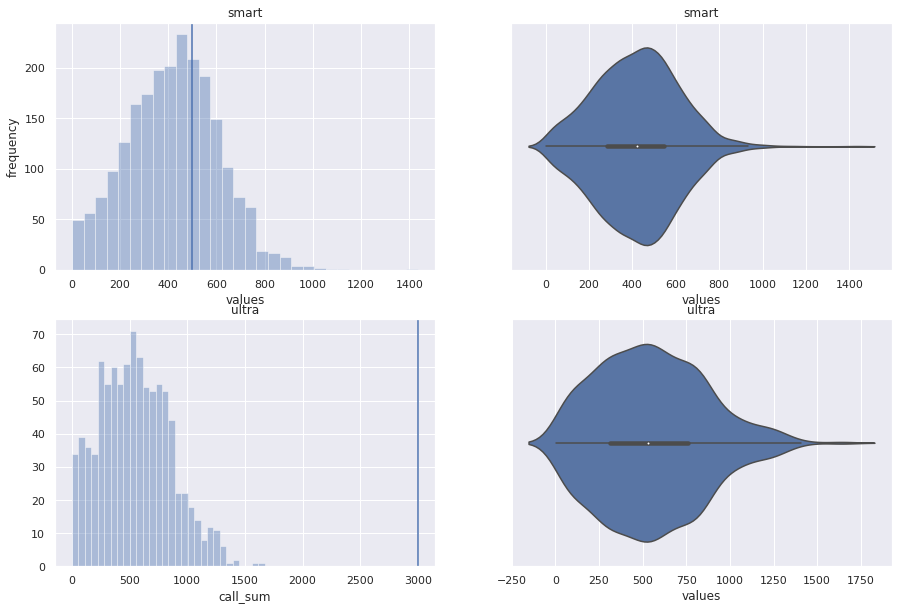

In [69]:
describe_stat(df_main.query('call_sum != 0'), 'call_sum', 30)

Как видно, если исключить из анализа пропущенные звонки, то кардинально общую картину это не изменит.

Рассмотрим теперь характеристики столбца количества звонков call_count.

                        Характеристика столбца call_count

                         Тариф smart                                   Тариф ultra
Общее количество:            2229.00                                         985.00
Среднее арифметическое:        58.46                                          73.39
Медиана:                       60.00                                          74.00
Дисперсия:                    672.57                                        1926.73
Стандартное отклонение:        25.93                                          43.89


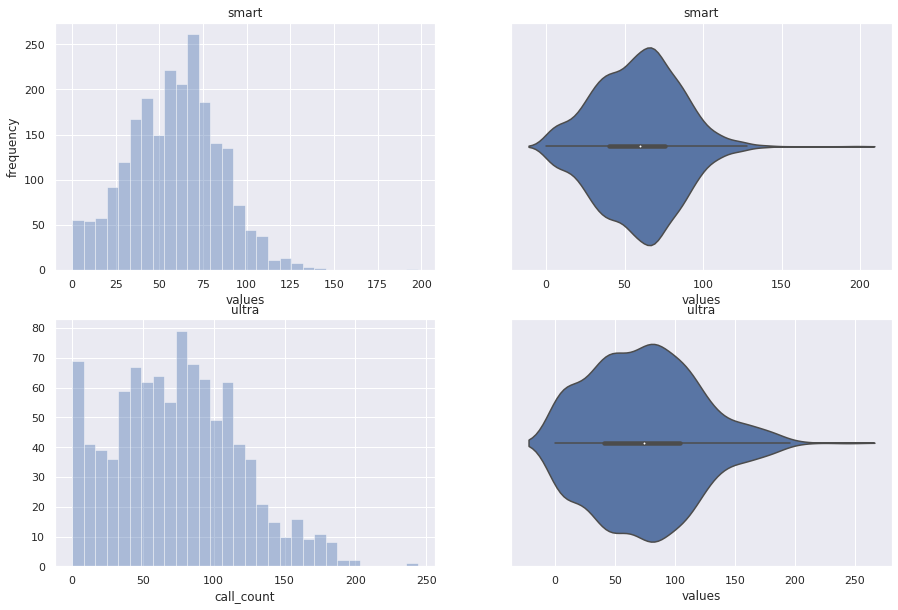

In [70]:
describe_stat(df_main, 'call_count', 30)

Как видно из полученных данных пользователи тарифа смарт совершают в среднем 58.46 звонков в месяц, медианное значение - 60. Стандартное отклонение 25.93. Пользователи тарифа ultra совершают в среднем на 15 звонков больше -  73.39 звонков, медианное значение больше - 74.00. При этом стандартное отклонение также больше - 43.89.

Перейдем к столбцу количества отправленных сообщений в месяц.

                        Характеристика столбца message_count

                         Тариф smart                                   Тариф ultra
Общее количество:            2229.00                                         985.00
Среднее арифметическое:        33.38                                          49.36
Медиана:                       28.00                                          38.00
Дисперсия:                    796.46                                        2282.95
Стандартное отклонение:        28.22                                          47.78


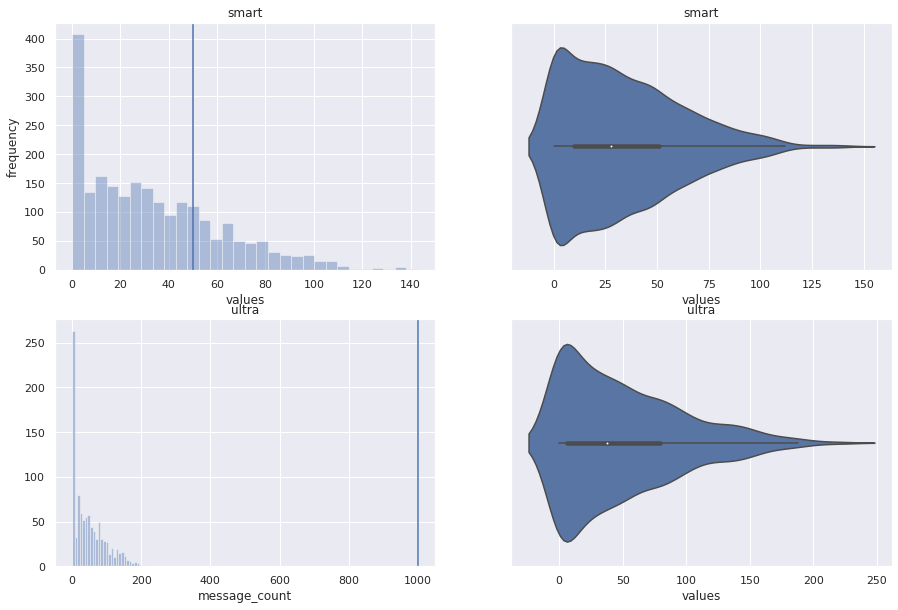

In [71]:
describe_stat(df_main, 'message_count', 30)

Как видно из данных, что сообщениями пользуются редко, как пользователи тарифа smart, так и пользователи тарифа ultra. Но в тарифе smart в целом больше и есть пользователи, которые выходят за предел 50 сообщений в месяц, включенные в тариф, а в выборке пользователи тарифа ultra самое большое количество сообщений - 200, а это в пять раз меньше, чем включено в тариф (1000 сообщений). 

Перейдем к столбцу использованного интернет-трафика в гигабайтах.

                        Характеристика столбца gb_used_sum

                         Тариф smart                                   Тариф ultra
Общее количество:            2229.00                                         985.00
Среднее арифметическое:        16.33                                          19.49
Медиана:                       17.00                                          19.00
Дисперсия:                     33.01                                          96.99
Стандартное отклонение:         5.75                                           9.85


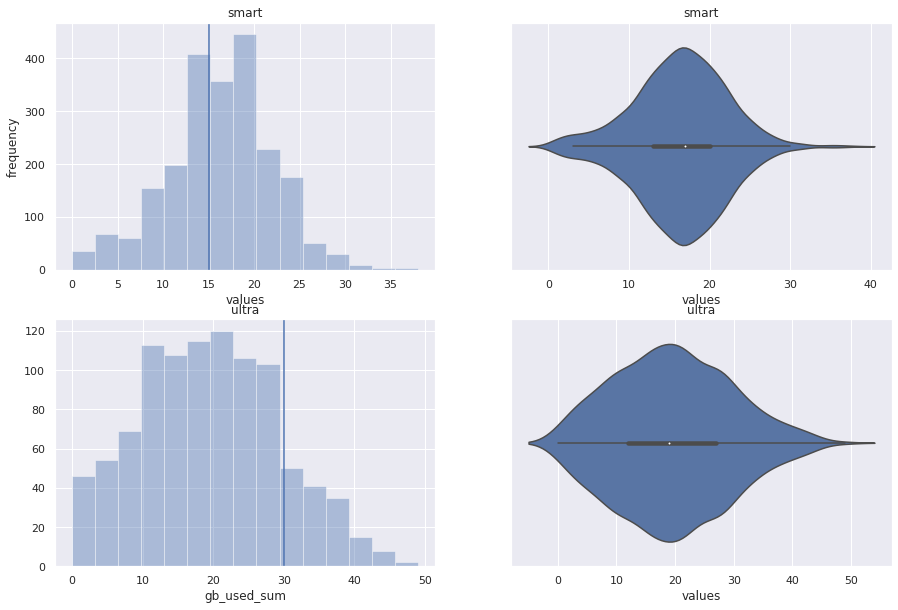

In [72]:
describe_stat(df_main, 'gb_used_sum', 15)

Из полученных данных видно, что пользователи тарифа smart в среднем используют 16.33 Гб интернет-траффика. Медианное значение больше - 17 Гб. Большинство пользователей тарифа выходят за лимит объема трафика, включенного в тариф. 

Пользователи же тарифа ultra тоже выходят за лимит, но большинство все же укладываются в лимит 30 Гб в месяц. Среднее значение 19.49 Гб, а медианное почти совпадает с среднем - 19 Гб. Разброс значений в два раза больше, чем у пользователей тарифа smart - 9.85. Это скорее всего связано с тем, что в выборке пользователей тарифа ultra в два раза меньше, чем пользователей тарифа smart.

Исключим из анализа пустые значения в столбце gb_used_sum и сравним с общими данными.

                        Характеристика столбца gb_used_sum

                         Тариф smart                                   Тариф ultra
Общее количество:            2227.00                                         974.00
Среднее арифметическое:        16.34                                          19.71
Медиана:                       17.00                                          19.00
Дисперсия:                     32.80                                          93.75
Стандартное отклонение:         5.73                                           9.68


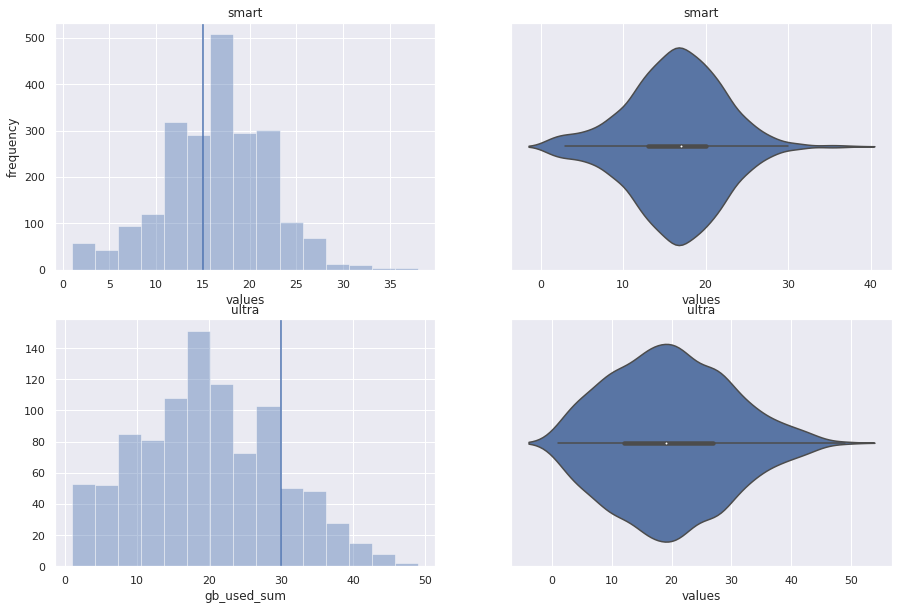

In [73]:
describe_stat(df_main.query('gb_used_sum != 0'), 'gb_used_sum', 15)

Как видно, почти ничего не поменялось. Исключение пустых строк не влияет на общую картину. Их можно оставить.

### Анализ выручки

Рассмотрим диаграммы размаха прибыли всех пользователей и отдельно по каждому тарифу.

Text(0.5, 1.0, 'Ultra')

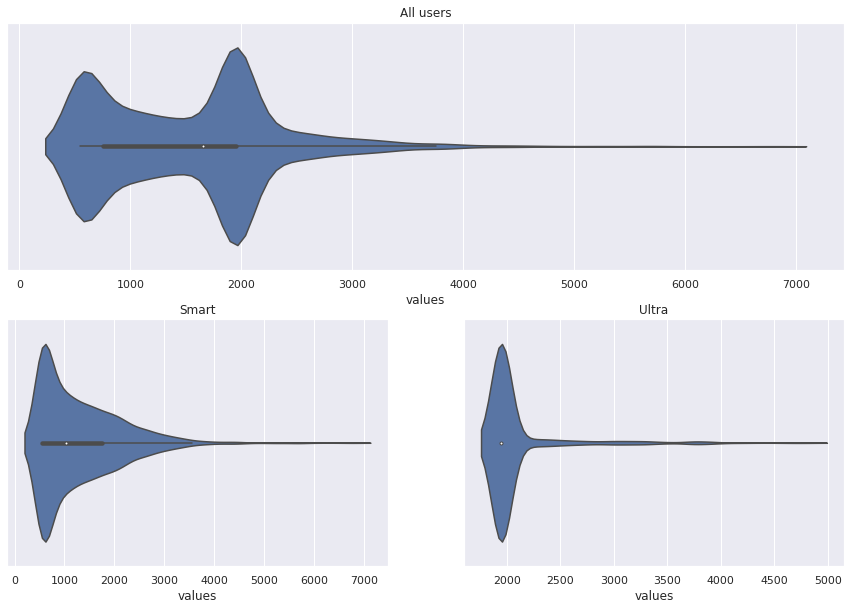

In [74]:
sns.set(rc={"figure.figsize": (15, 10)})

plt.subplot(2, 1, 1)
sns.violinplot(x="profit", data=df_main)
plt.title('All users')
plt.xlabel('values')


plt.subplot(2, 2, 3)
sns.violinplot(x="profit", data=df_main.query('tariff_name == "smart"'))
plt.xlabel('values')
plt.title('Smart')

plt.subplot(2, 2, 4)
sns.violinplot(x="profit", data=df_main.query('tariff_name == "ultra"'))
plt.xlabel('values')
plt.title('Ultra')


Из диаграммы видно, что большинство пользователей укладывается в бюджет до 2000 рублей. Рассмотрим данные через гистограмму.

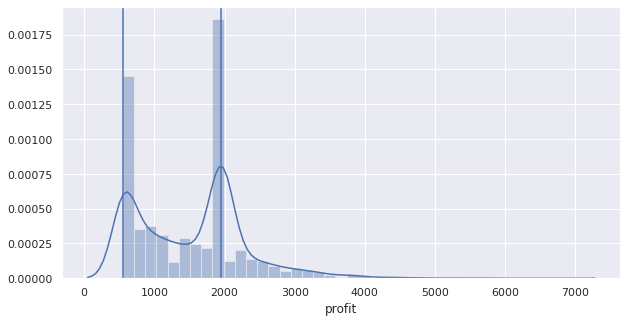

In [75]:
sns.set(rc={"figure.figsize": (10, 5)})
sns.distplot(df_main['profit'])
plt.axvline(x=550)
plt.axvline(x=1950)

Как видно, больинство пользователей стараются укладываться в бюджет абоненской платы. Это подтверждается данными ниже.

                        Характеристика столбца profit

                         Тариф smart                                   Тариф ultra
Общее количество:            2229.00                                         985.00
Среднее арифметическое:      1289.97                                        2070.15
Медиана:                     1023.00                                        1950.00
Дисперсия:                 669485.22                                      141373.07
Стандартное отклонение:       818.22                                         376.00


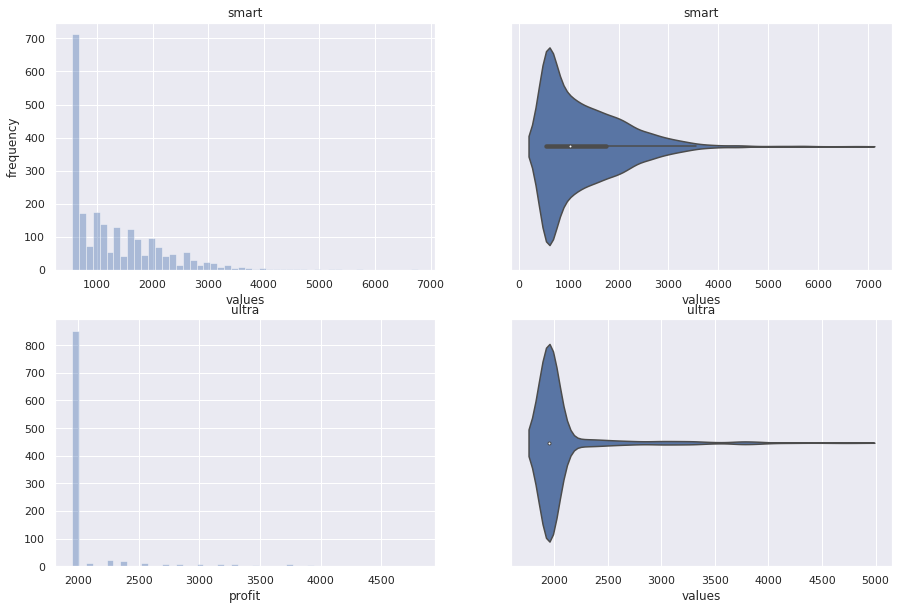

In [76]:
describe_stat(df_main, 'profit', 50)

Вычислим процент месяцев, в которых клиенты выходили за лимит абоненской платы отдельно по каждому тарифу.

In [77]:
pd.pivot_table(df_main, index = 'tariff_name', values = ['call_done', 'message_done', 'internet_done'], \
               aggfunc = 'mean')

,call_done,internet_done,message_done
tariff_name,,,
smart,0.339614,0.648721,0.260655
ultra,0.000000,0.153299,0.000000


Как видно, если есть возможность, что клиенты стараются не выходить за лимит абоненской платы. Исключение составляет интернет-трафик в тарифе smart, здесь процент месяцев, в которых клиенты вышли за предел лимина составляет 65%.

### Вывод

Итак, можно сделать вывод, что поведение клиентов тарифов smart и ultra имеют свои особенности:
1. Пользователи тарифа smart стараются не выходить за предел лимита тарифа - 550 минут, но при этом большинство клиентов стараются максимально израсходовать включенные в тариф минуты. Пользователи тарифа ultra почти никогда не выходят за лимит - 3000 минут, причем абсолютное большинство  не наговаривает и половины своего лимита.
2. Сообщениями пользуются редко, как пользователи тарифа smart, так и пользователи тарифа ultra. В тарифе smart в целом больше и есть пользователи, которые выходят за предел 50 сообщений в месяц, включенные в тариф, а в выборке пользователи тарифа ultra самое большое количество сообщений - 200, а это в пять раз меньше, чем включено в тариф (1000 сообщений)
3. Большинство пользователей тарифа smart выходят за лимит объема трафика, включенного в тариф 15 Гб. Пользователи же тарифа ultra тоже выходят за лимит, но большинство все же укладываются в лимит 30 Гб в месяц.
5. Большинство пользователей стараются укладываться в бюджет абоненской платы. Если смотреть разбраз значений по всем пользователям, то большинство укладывается в бюджет до 2000 рублей.

## Проверка гипотез

Проверим гипотезы об эффективности тарифов. Сформулируем нулевую гипотезу.

* Средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.

Альтернативная гипотеза это когда мы будет считать, что выручка пользователей двух тарифов не равна.

Посмотрим медианную выручку по каждому тарифу.

In [78]:
df_main.groupby('tariff_name')['profit'].agg(['count','mean','median'])

,count,mean,median
tariff_name,,,
smart,2229,1289.973531,1023.0
ultra,985,2070.152284,1950.0


Видно, что средняя выручка и медианная отличается - у тарифа ultra она больше. Можно предположить, что средняя выручка тарифа ultra больше, чем средняя выручка тарифа smart. Проведем односторонний тест.

Напишем функцию, которая стравнивает выручку пользователей тарифа smart и ultra и возвращает значение p-value, по которому далее мы можем определить равенство двух совокупностей.

In [79]:
from scipy import stats as st
def hyp_zero(df, column):
    ultra = df.query('tariff_name == "ultra"')
    smart = df.query('tariff_name == "smart"')
    
    result =  st.ttest_ind(ultra[column], smart[column], equal_var = False) 
    return result.pvalue

Применим нашу функцию к столбцу помесячной выручки profit.

In [80]:
hyp_zero(df_main, 'profit')

4.2606313931076085e-250

Видно, что значение p-value очень маленькое. Выберем вероятность ошибки alpha = 0.005. Выясним, можно ли опровергнуть нулевую гипотезу.

In [81]:
hyp_zero(df_main, 'profit') / 2 < 0.005

True

Нам удалось опровергнуть нашу нулевую гипотезу, что выручки пользователей двух тарифов равны. Очевидно, что выручка тарифа ultra больше, чем выручка тарифа smart.

Теперь сформулирует вторую нулевую гипотезу.

* Средняя выручка пользователей из Москвы от выручка пользователей других регионов равна.

Альтернативная гипотеза будет означать, что выручка пользователей из Москвы и других регионов не равна.

Напишем функцию, которая стравнивает выручку пользователей из Москвы и пользователей остальных регионов и возвращает значение и возвращает значение p-value, по которому далее мы можем определить равенство двух совокупностей.

In [82]:
def hyp_zero_moscow(df, column):
    moscow = df.query('city == "Москва"')
    other = df.query('city != "Москва"')
    
    result =  st.ttest_ind(moscow[column], other[column]) 
    return result.pvalue

Применим нашу функцию к столбцу помесячной выручки profit.

In [83]:
hyp_zero_moscow(df_main, 'profit')

0.5440152911670224

Видно, что значение p-value довольно большое. Выберем вероятность ошибки alpha = 0.005

In [84]:
hyp_zero_moscow(df_main, 'profit') < 0.005

False

Нам не удалось опровергнуть нулевую гипотезу, что выручка пользователей из Москвы и других регионов равна. Поэтому принимаем нулевую гипотезу, что выручки отличаются.

### Вывод

Итак, можно сделать вывод, что:
1. Гипотеза о том, что средняя выручка пользователей тарифов ultra и smart равна опровергнута. Средняя выручка тарифа ultra больше, чем средняя выручка тарифа smart.
2. Гипотеза о том, что выручка пользователей Москвы и других регионов равны подтвердилась.

## Вывод

Изучив данные 500 пользователей тарифа smart и ultra мы пришли к выводам:

1. Пользователи тарифа smart стараются не выходить за предел лимитов звонков и сообщений, но в большинстве случаев выходят за лимит по объему интернет-трафика.
2. Пользователи тарифа ultra почти никогда не выходят за лимит звонков и сообщений, причем абсолютное большинство не наговаривает и половины своего лимита количества минут, если же анализировать сообщения, то самое большое количество сообщений, которые отправляют клиенты данного тарифа в месяц - 200, а это в пять раз меньше, чем включено в тариф (1000 сообщений). Пользователи же тарифа ultra выходят за лимит объема интернет-трафика, но большинство все же укладываются в лимит 30 Гб в месяц.
3. Если смотреть разброс значений по всем пользователям, то большинство укладывается в бюджет до 2000 рублей.
4. Гипотеза о том, что средняя выручка пользователей тарифов ultra и smart равна опровергнута. Средняя выручка тарифа ultra больше, чем средняя выручка тарифа smart.
5. Гипотеза о том, что выручка пользователей Москвы и других регионов равны подтвердилась.

Из этого можно сделать вывод, что выгоднее всего рекламировать тариф ultra, причем сделать упор на интернет-трафик.